In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd

# Euro 2024 data
euro_df = pd.read_csv('/content/drive/MyDrive/DSA210/Euro_2024_Matches.csv')

# Süper Lig data
super_lig_df = pd.read_csv('/content/drive/MyDrive/DSA210/2023_2024_super_lig_statistics.csv', sep=';')

# Take a look at the first rows
print("Euro 2024 :")
print(euro_df.head())

print("\nSüper Lig :")
print(super_lig_df.head())


Euro 2024 :
                 stadium attendance home_team    away_team  home_goals  \
0    Fuball Arena Mnchen     65,052   Germany     Scotland           5   
1        Cologne Stadium     41,676   Hungary  Switzerland           1   
2  Olympiastadion Berlin     68,844     Spain      Croatia           3   
3   BVB Stadion Dortmund     60,512     Italy      Albania           2   
4       Volksparkstadion     48,117    Poland  Netherlands           1   

   away_goals  Home Expected goals(xG)  Home Total shots  \
0           1                     2.15                20   
1           3                     1.25                 6   
2           0                     2.01                11   
3           1                     1.56                17   
4           2                     1.32                12   

   Home Shots on target  Home Big chances  ...  Away Red cards  \
0                    10                 1  ...               1   
1                     2                 3  ...    

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


In [5]:

# Select required columns
x = super_lig_df['encounters_in_opponent_box']
y = super_lig_df['expected_goals_xg']


In [6]:
# Calculate the Pearson correlation coefficient and p-value
r_value, p_value = pearsonr(x, y)

print(f"📈 Pearson r: {r_value:.2f}")
print(f"📊 p-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("✅ Result: There is a significant relationship (Reject H₀)")
else:
    print("❌ Result: There is no significant relationship (Fail to reject H₀)")



📈 Pearson r: 0.96
📊 p-value: 0.00000
✅ Result: There is a significant relationship (Reject H₀)


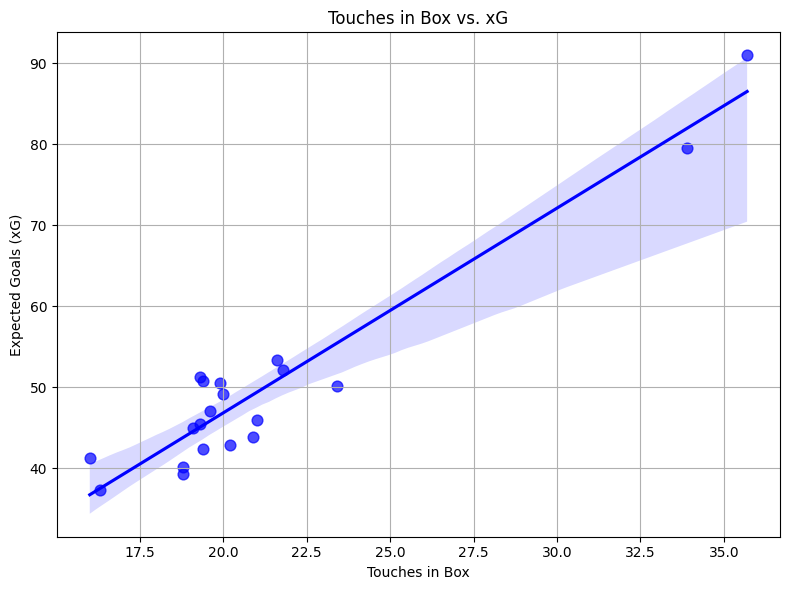

In [7]:
plt.figure(figsize=(8,6))
sns.regplot(x=x, y=y, color='blue', scatter_kws={'s': 60, 'alpha': 0.7})
plt.xlabel('Touches in Box')
plt.ylabel('Expected Goals (xG)')
plt.title('Touches in Box vs. xG')
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
# For Home team DataFrame
home_df = euro_df[['home_team', 'Home Touches in opposition box', 'Home Expected goals (xG)']].copy()
home_df.columns = ['Team', 'box_touches', 'xG']

# For Away team DataFrame
away_df = euro_df[['away_team', 'Away Touches in opposition box', 'Away Expected goals (xG)']].copy()
away_df.columns = ['Team', 'box_touches', 'xG']

# Combination of two of them
combined_df = pd.concat([home_df, away_df], ignore_index=True)

In [9]:
from scipy.stats import pearsonr

x = combined_df['box_touches']
y = combined_df['xG']

r_value, p_value = pearsonr(x, y)

print(f"📈 Pearson r: {r_value:.2f}")
print(f"📊 p-value: {p_value:.5f}")

if p_value < 0.05:
    print("✅ There is a significant relationship (H₀ is rejected)")
else:
    print("❌ There is no significant relationship (H₀ is not rejected)")


📈 Pearson r: 0.67
📊 p-value: 0.00000
✅ There is a significant relationship (H₀ is rejected)


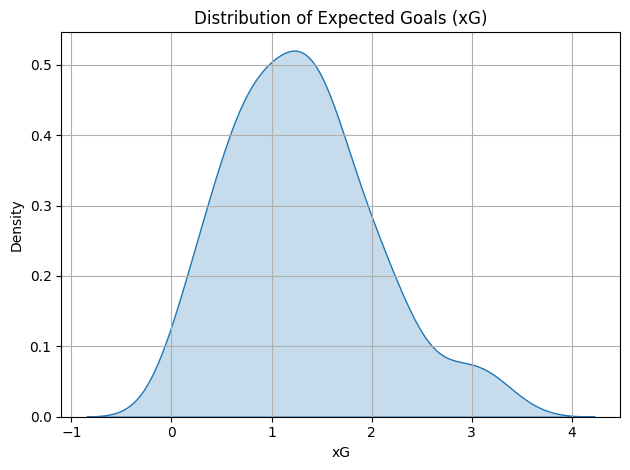

In [41]:
# KDE plot for xG distribution
sns.kdeplot(data=combined_df, x='xG', fill=True)
plt.title('Distribution of Expected Goals (xG)')
plt.xlabel('xG')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()


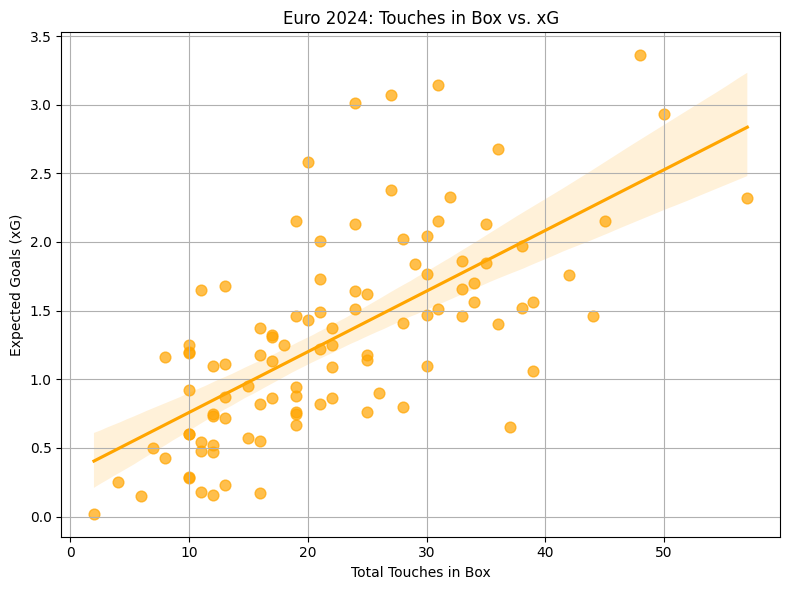

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.regplot(x='box_touches', y='xG', data=combined_df, scatter_kws={'s': 60, 'alpha': 0.7}, color='orange')
plt.xlabel('Total Touches in Box')
plt.ylabel('Expected Goals (xG)')
plt.title('Euro 2024: Touches in Box vs. xG')
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
# Convert all column names to lowercase and filter those containing 'pass'
for col in euro_df.columns:
    if 'pass' in col.lower():
        print(col)


Home Accurate passes
Home Passes
Home Accurate passes.1
Away Accurate passes
Away Passes
Away Accurate passes.1


In [12]:
## Home data
home = euro_df[['home_team',
                'Home Touches in opposition box',
                'Home Expected goals (xG)',
                'Home Accurate passes']].copy()
home.columns = ['Team', 'box_touches', 'xG', 'accurate_passes']

# Away data
away = euro_df[['away_team',
                'Away Touches in opposition box',
                'Away Expected goals (xG)',
                'Away Accurate passes']].copy()
away.columns = ['Team', 'box_touches', 'xG', 'accurate_passes']

# combine
combined_df = pd.concat([home, away], ignore_index=True)
combined_df.head()


,Team,box_touches,xG,accurate_passes
0,Germany,31,2.15,643(94%)
1,Hungary,10,1.25,643(94%)
2,Spain,21,2.01,365(83%)
3,Italy,34,1.56,365(83%)
4,Poland,17,1.32,383(84%)


In [13]:
# Use regex to split and create two new columns
combined_df[['accurate_passes', 'accurate_passes_ratio']] = combined_df['accurate_passes'].astype(str).str.extract(r'(\d+)\((\d+)%\)')

# Convert to numeric data types
combined_df['accurate_passes'] = combined_df['accurate_passes'].astype(float)
combined_df['accurate_passes_ratio'] = combined_df['accurate_passes_ratio'].astype(float)
combined_df['xG'] = combined_df['xG'].astype(float)


In [14]:
from scipy.stats import pearsonr

# Calculate correlation
r_value, p_value = pearsonr(combined_df['accurate_passes'], combined_df['xG'])

# Print results
print(f"🧠 Pearson r (xG vs Accurate Passes): {r_value:.2f}")
print(f"📊 p-value: {p_value:.5f}")

if p_value < 0.05:
    print("✅ There is a significant relationship between xG and Accurate Passes  (H₀ is rejected)")
else:
    print("❌ There is no significant relationship between xG and Accurate Passes (H₀ is not rejected)")



🧠 Pearson r (xG vs Accurate Passes): -0.17
📊 p-value: 0.08812
❌ There is no significant relationship between xG and Accurate Passes (H₀ is not rejected)


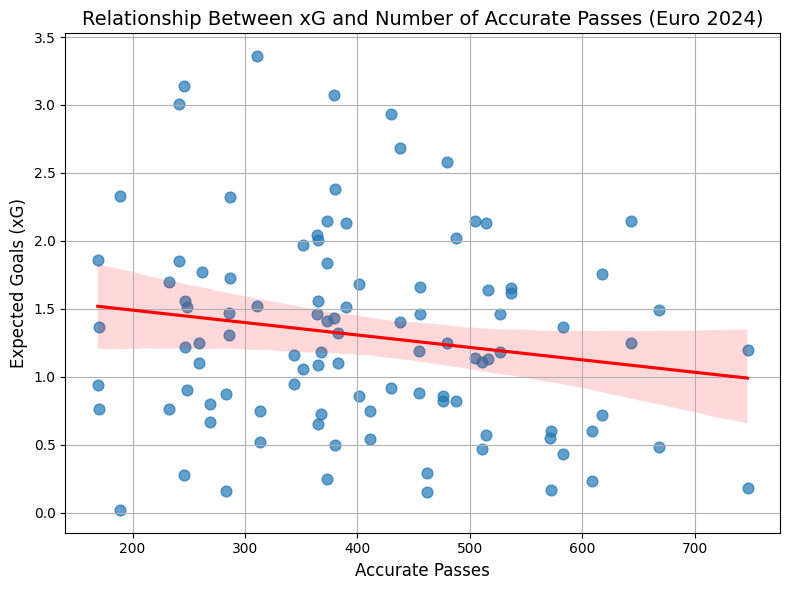

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.regplot(
    x='accurate_passes',
    y='xG',
    data=combined_df,
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'red'}
)

plt.xlabel('Accurate Passes', fontsize=12)
plt.ylabel('Expected Goals (xG)', fontsize=12)
plt.title('Relationship Between xG and Number of Accurate Passes (Euro 2024)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
print(combined_df[['accurate_passes', 'xG']].describe())
print(combined_df[['accurate_passes', 'xG']].isna().sum())


       accurate_passes          xG
count       102.000000  102.000000
mean        404.892157    1.303235
std         135.337415    0.728759
min         169.000000    0.020000
25%         287.000000    0.760000
50%         381.500000    1.235000
75%         505.000000    1.695000
max         747.000000    3.360000
accurate_passes    0
xG                 0
dtype: int64


In [17]:
# Home teams
home = euro_df[['home_team', 'Home Touches in opposition box', 'Home Expected goals (xG)', 'Home Accurate passes']].copy()
home.columns = ['Team', 'box_touches', 'xG', 'accurate_passes']

# Away teams
away = euro_df[['away_team', 'Away Touches in opposition box', 'Away Expected goals (xG)', 'Away Accurate passes']].copy()
away.columns = ['Team', 'box_touches', 'xG', 'accurate_passes']

# Combine both home and away


In [18]:
# Split the 'accurate_passes' column into count and percentage
combined_df[['accurate_passes', 'accurate_passes_ratio']] = combined_df['accurate_passes'].astype(str).str.extract(r'(\d+)\((\d+)%\)')

# Convert to float
combined_df['accurate_passes'] = combined_df['accurate_passes'].astype(float)
combined_df['accurate_passes_ratio'] = combined_df['accurate_passes_ratio'].astype(float)


In [19]:
# Convert the xG column to proper float format
combined_df['xG'] = combined_df['xG'].astype(str).str.replace(',', '.').str.extract(r'(\d+\.?\d*)')[0]
combined_df['xG'] = combined_df['xG'].astype(float)


In [20]:
r, p = pearsonr(combined_df['accurate_passes'], combined_df['xG'])

print(f"📈 Pearson r: {r:.2f}")
print(f"📊 p-value: {p:.5f}")

if p < 0.05:
    print("✅ There is a significant relationship (H₀ is rejected)")
else:
    print("❌ There is no significant relationship (H₀ is not



SyntaxError: unterminated string literal (detected at line 9) (<ipython-input-20-eb980eab558d>, line 9)

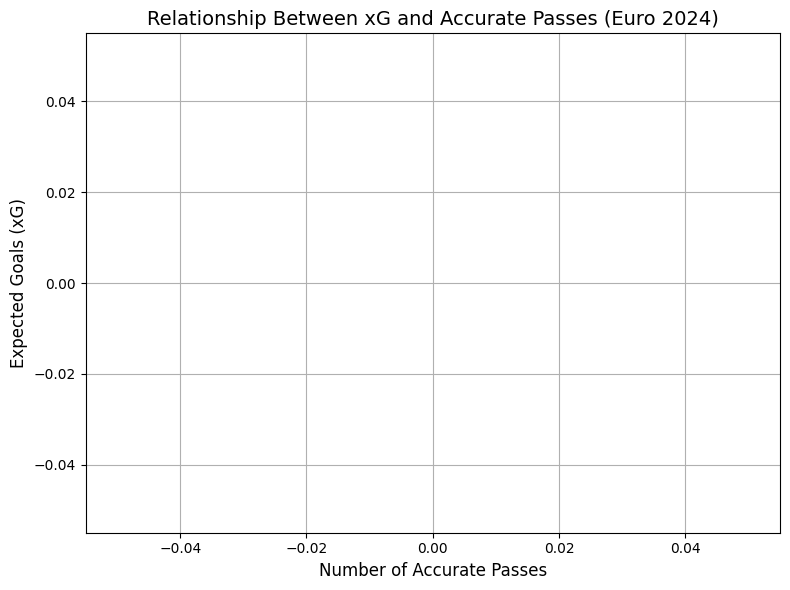

In [21]:
plt.figure(figsize=(8,6))
sns.regplot(
    x='accurate_passes',
    y='xG',
    data=combined_df.dropna(subset=['accurate_passes', 'xG']),
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'red'}
)

plt.xlabel('Number of Accurate Passes', fontsize=12)
plt.ylabel('Expected Goals (xG)', fontsize=12)
plt.title('Relationship Between xG and Accurate Passes (Euro 2024)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
# Home
home = euro_df[['home_team', 'Home Accurate passes', 'Home Non-penalty xG']].copy()
home.columns = ['Team', 'accurate_passes_raw', 'open_play_xG']

# Away
away = euro_df[['away_team', 'Away Accurate passes', 'Away Non-penalty xG']].copy()
away.columns = ['Team', 'accurate_passes_raw', 'open_play_xG']

# Birleştir
combined_open = pd.concat([home, away], ignore_index=True)


In [23]:
# "643(94%)" → "94"
combined_open['accurate_passes_ratio'] = combined_open['accurate_passes_raw'].astype(str).str.extract(r'\d+\((\d+)%\)')
combined_open['accurate_passes_ratio'] = combined_open['accurate_passes_ratio'].astype(float)


In [24]:
from scipy.stats import pearsonr

# Calculate correlation between accurate_passes_ratio and open_play_xG
r, p = pearsonr(combined_open['accurate_passes_ratio'], combined_open['open_play_xG'])

print(f"📈 Pearson r: {r:.2f}")
print(f"📊 p-value: {p:.5f}")

if p < 0.05:
    print("✅ There is a significant relationship (H₀ is rejected)")
else:
    print("❌ There is no significant relationship (H₀ is not rejected)")



📈 Pearson r: -0.14
📊 p-value: 0.15560
❌ There is no significant relationship (H₀ is not rejected)


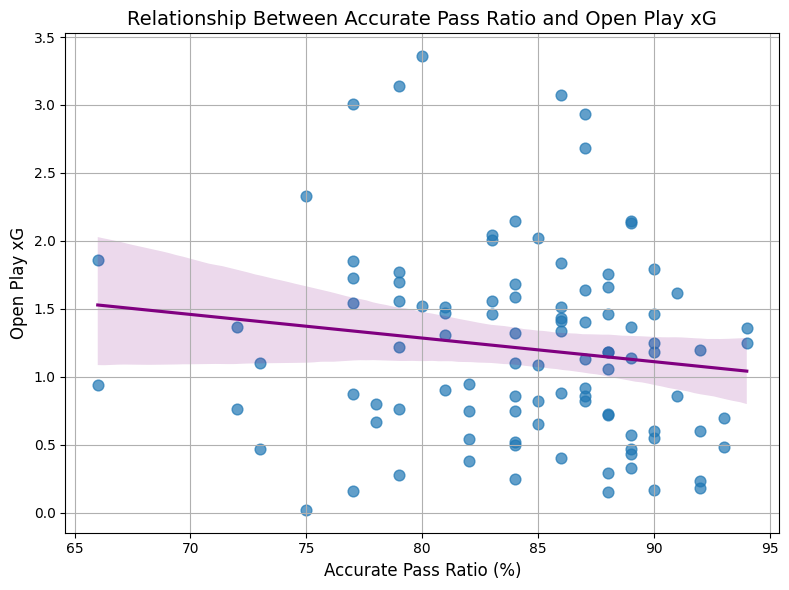

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.regplot(
    x='accurate_passes_ratio',
    y='open_play_xG',
    data=combined_open.dropna(),
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'purple'}
)

plt.xlabel('Accurate Pass Ratio (%)', fontsize=12)
plt.ylabel('Open Play xG', fontsize=12)
plt.title('Relationship Between Accurate Pass Ratio and Open Play xG', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


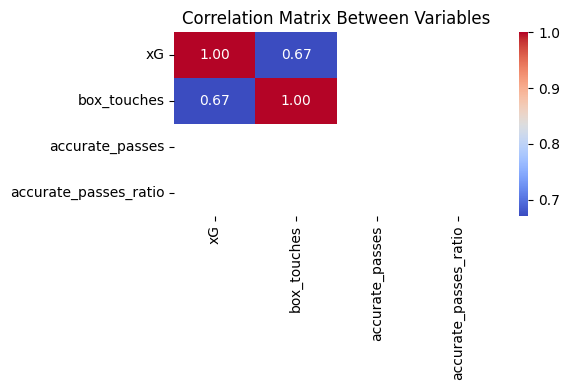

In [26]:
# Select the required numeric columns for the correlation matrix
corr_df = combined_df[['xG', 'box_touches', 'accurate_passes', 'accurate_passes_ratio']]
corr = corr_df.corr()

# Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Between Variables')
plt.tight_layout()
plt.show()


In [27]:
# Convert possession percentage to float
super_lig_df['possession_percentage'] = (
    super_lig_df['possession_percentage']
    .astype(str)
    .str.replace(',', '.')
    .str.extract(r'(\d+\.?\d*)')[0]
    .astype(float)
)

# Convert box encounters to float
super_lig_df['encounters_in_opponent_box'] = (
    super_lig_df['encounters_in_opponent_box']
    .astype(str)
    .str.extract(r'(\d+)')[0]
    .astype(float)
)


In [28]:
r, p = pearsonr(
    super_lig_df['possession_percentage'],
    super_lig_df['encounters_in_opponent_box']
)

print(f"📈 Pearson r: {r:.2f}")
print(f"📊 p-value: {p:.5f}")

if p < 0.05:
    print("✅ Statistically significant correlation found (reject H₀)")
else:
    print("❌ No statistically significant correlation (fail to reject H₀)")


📈 Pearson r: 0.76
📊 p-value: 0.00010
✅ Statistically significant correlation found (reject H₀)


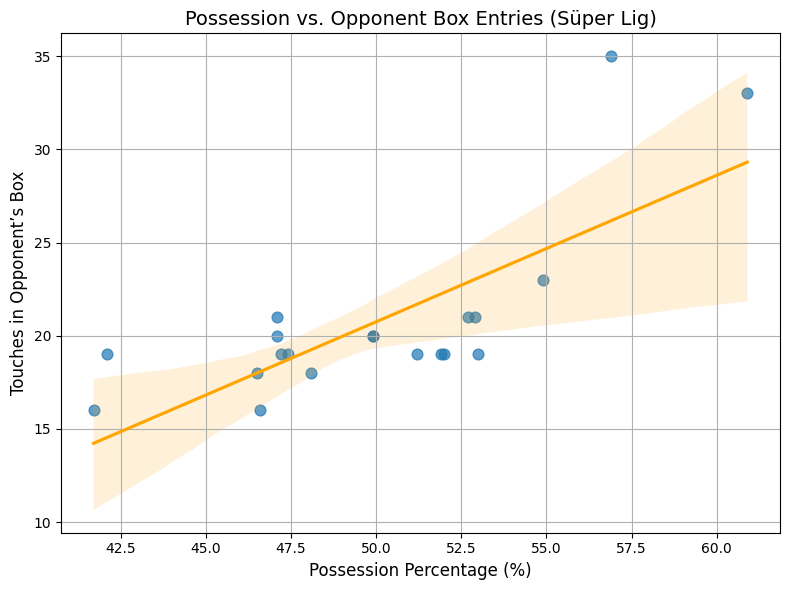

In [29]:
plt.figure(figsize=(8,6))
sns.regplot(
    x='possession_percentage',
    y='encounters_in_opponent_box',
    data=super_lig_df,
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'orange'}
)

plt.xlabel('Possession Percentage (%)', fontsize=12)
plt.ylabel('Touches in Opponent’s Box', fontsize=12)
plt.title('Possession vs. Opponent Box Entries (Süper Lig)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


🔹 Open Play xG vs Pass Accuracy: r = -0.17, p = 0.07858
🔹 Set Piece xG vs Pass Accuracy: r = 0.03, p = 0.79185


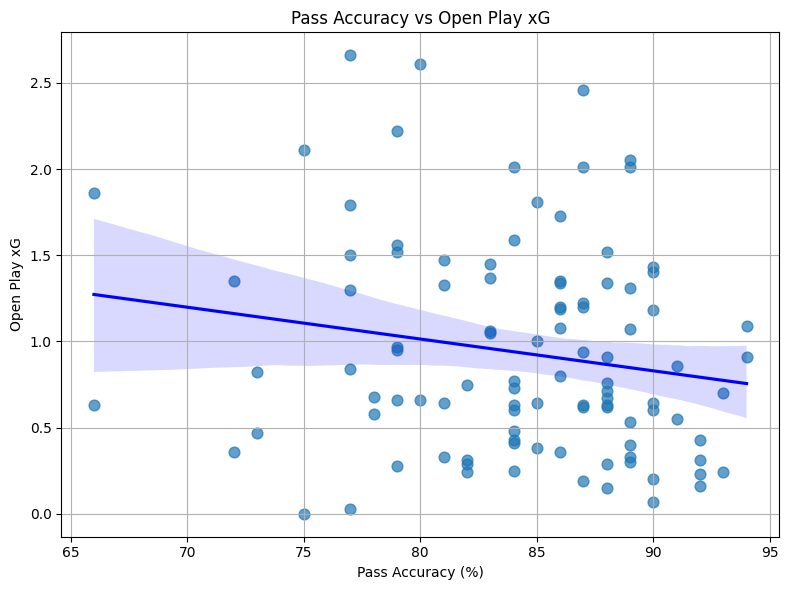

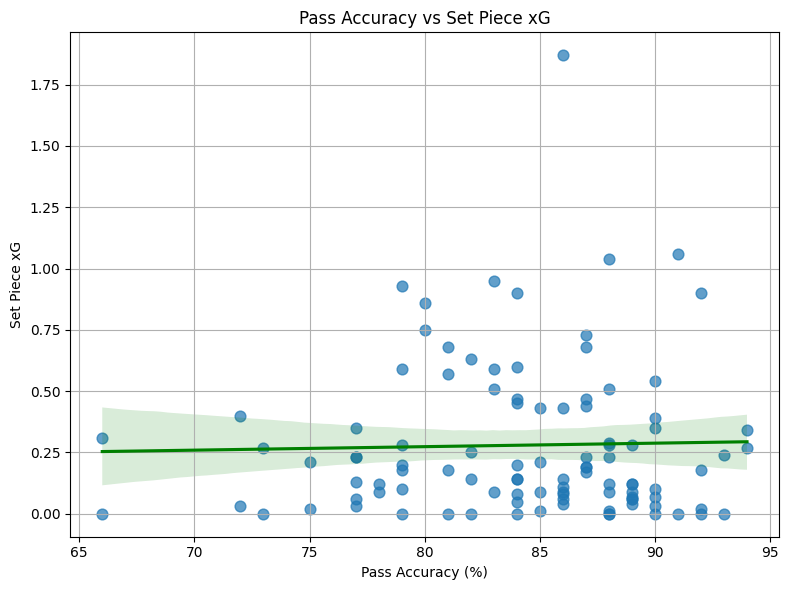

In [30]:
# --- PASS ACCURACY vs OPEN / SET PIECE xG ANALYSIS ---

# 1. Prepare home and away dataframes
home = euro_df[[
    'home_team', 'Home Passes', 'Home Accurate passes',
    'Home xG open play', 'Home xG set play'
]].copy()

away = euro_df[[
    'away_team', 'Away Passes', 'Away Accurate passes',
    'Away xG open play', 'Away xG set play'
]].copy()

# 2. Rename columns for uniformity
home.columns = ['Team', 'total_passes', 'accurate_passes_raw', 'open_play_xG', 'set_piece_xG']
away.columns = ['Team', 'total_passes', 'accurate_passes_raw', 'open_play_xG', 'set_piece_xG']

# 3. Combine home and away
combined_df = pd.concat([home, away], ignore_index=True)

# 4. Clean numeric values
for col in ['total_passes', 'open_play_xG', 'set_piece_xG']:
    combined_df[col] = (
        combined_df[col]
        .astype(str)
        .str.replace(',', '.')
        .str.extract(r'(\d+\.?\d*)')[0]
        .astype(float)
    )

# 5. Extract accurate_passes and pass_accuracy from combined string like "643(94%)"
combined_df[['accurate_passes', 'pass_accuracy']] = (
    combined_df['accurate_passes_raw']
    .astype(str)
    .str.extract(r'(\d+)\((\d+)%\)')
    .astype(float)
)

# 6. Correlation analysis
from scipy.stats import pearsonr

r_open, p_open = pearsonr(combined_df['pass_accuracy'], combined_df['open_play_xG'])
r_set, p_set = pearsonr(combined_df['pass_accuracy'], combined_df['set_piece_xG'])

print(f"🔹 Open Play xG vs Pass Accuracy: r = {r_open:.2f}, p = {p_open:.5f}")
print(f"🔹 Set Piece xG vs Pass Accuracy: r = {r_set:.2f}, p = {p_set:.5f}")

# 7. Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Open play xG graph
plt.figure(figsize=(8, 6))
sns.regplot(
    x='pass_accuracy',
    y='open_play_xG',
    data=combined_df,
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'blue'}
)
plt.xlabel('Pass Accuracy (%)')
plt.ylabel('Open Play xG')
plt.title('Pass Accuracy vs Open Play xG')
plt.grid(True)
plt.tight_layout()
plt.show()

# Set piece xG graph
plt.figure(figsize=(8, 6))
sns.regplot(
    x='pass_accuracy',
    y='set_piece_xG',
    data=combined_df,
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'green'}
)
plt.xlabel('Pass Accuracy (%)')
plt.ylabel('Set Piece xG')
plt.title('Pass Accuracy vs Set Piece xG')
plt.grid(True)
plt.tight_layout()
plt.show()


📈 Pearson r = -0.18
📊 p-value = 0.07410
                            OLS Regression Results                            
Dep. Variable:      open_vs_set_ratio   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3.258
Date:                Thu, 29 May 2025   Prob (F-statistic):             0.0741
Time:                        19:37:01   Log-Likelihood:                -1420.4
No. Observations:                 102   AIC:                             2845.
Df Residuals:                     100   BIC:                             2850.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const 

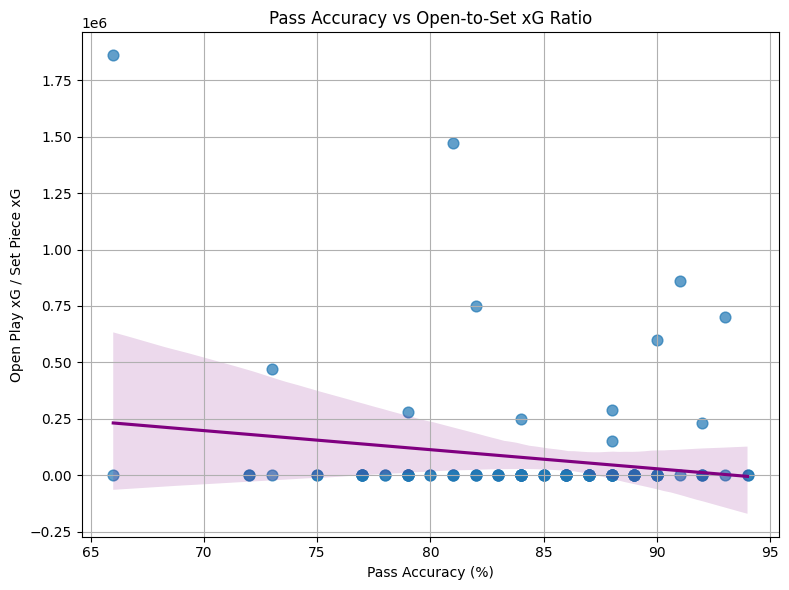

In [31]:
# --- PASS ACCURACY vs OPEN / SET PIECE xG RATIO ANALYSIS ---

# Create open-to-set xG ratio (prevent division by zero)
combined_df['open_vs_set_ratio'] = combined_df['open_play_xG'] / (combined_df['set_piece_xG'] + 1e-6)

# Pearson Correlation
from scipy.stats import pearsonr
r_ratio, p_ratio = pearsonr(combined_df['pass_accuracy'], combined_df['open_vs_set_ratio'])
print(f"📈 Pearson r = {r_ratio:.2f}")
print(f"📊 p-value = {p_ratio:.5f}")

# Linear Regression: open_vs_set_ratio ~ pass_accuracy
import statsmodels.api as sm

X = sm.add_constant(combined_df['pass_accuracy'])  # add intercept
y = combined_df['open_vs_set_ratio']

model = sm.OLS(y, X).fit()
print(model.summary())

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.regplot(
    x='pass_accuracy',
    y='open_vs_set_ratio',
    data=combined_df,
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'purple'}
)
plt.xlabel('Pass Accuracy (%)')
plt.ylabel('Open Play xG / Set Piece xG')
plt.title('Pass Accuracy vs Open-to-Set xG Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
# Örnek: Euro 2024 verisinden home ve away birleştirilen combined_df
home = euro_df[[
    'home_team', 'Home Passes', 'Home Accurate passes',
    'Home xG open play', 'Home xG set play'
]].copy()

away = euro_df[[
    'away_team', 'Away Passes', 'Away Accurate passes',
    'Away xG open play', 'Away xG set play'
]].copy()

home.columns = ['Team', 'total_passes', 'accurate_passes_raw', 'open_play_xG', 'set_piece_xG']
away.columns = ['Team', 'total_passes', 'accurate_passes_raw', 'open_play_xG', 'set_piece_xG']

combined_df = pd.concat([home, away], ignore_index=True)


📊 Mean Squared Error: 49.22
📈 R² Score: 0.88


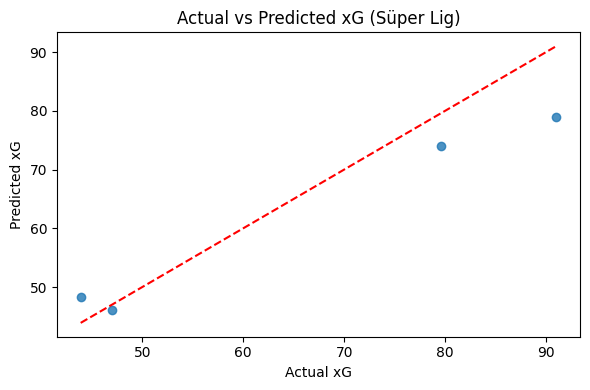

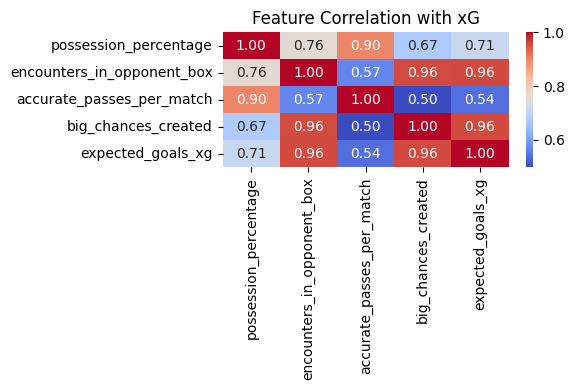

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Özellikler ve hedef (xG)
features = super_lig_df[['possession_percentage', 'encounters_in_opponent_box',
                        'accurate_passes_per_match', 'big_chances_created']]
target = super_lig_df['expected_goals_xg']

# Eğitim ve test setine ayır
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model eğitimi
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Tahmin ve değerlendirme
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 Mean Squared Error: {mse:.2f}")
print(f"📈 R² Score: {r2:.2f}")

# 📉 Visual 1: Actual vs Predicted xG
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.8)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual xG")
plt.ylabel("Predicted xG")
plt.title("Actual vs Predicted xG (Süper Lig)")
plt.tight_layout()
plt.show()

# 📊 Visual 2: Correlation Heatmap
plt.figure(figsize=(6, 4))
corr = pd.concat([features, target], axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation with xG")
plt.tight_layout()
plt.show()


🌳 Decision Tree - Süper Lig
📊 Mean Squared Error: 544.35
📈 R² Score: -0.31


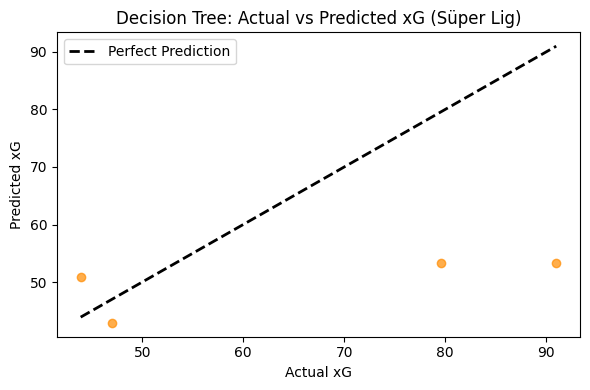

In [34]:
# Decision Tree Regression for super_lig_df

from sklearn.tree import DecisionTreeRegressor

# Features and target for Süper Lig
features_sl = super_lig_df[['possession_percentage', 'encounters_in_opponent_box',
                           'accurate_passes_per_match', 'big_chances_created']]
target_sl = super_lig_df['expected_goals_xg']

# Train-test split
X_train_sl, X_test_sl, y_train_sl, y_test_sl = train_test_split(features_sl, target_sl, test_size=0.2, random_state=42)

# Train Decision Tree model
dt_model_sl = DecisionTreeRegressor(random_state=42)
dt_model_sl.fit(X_train_sl, y_train_sl)

# Predictions and evaluation
y_pred_dt_sl = dt_model_sl.predict(X_test_sl)
mse_dt_sl = mean_squared_error(y_test_sl, y_pred_dt_sl)
r2_dt_sl = r2_score(y_test_sl, y_pred_dt_sl)

# Print metrics
print(f"🌳 Decision Tree - Süper Lig")
print(f"📊 Mean Squared Error: {mse_dt_sl:.2f}")
print(f"📈 R² Score: {r2_dt_sl:.2f}")

# Visualization
plt.figure(figsize=(6, 4))
plt.scatter(y_test_sl, y_pred_dt_sl, alpha=0.7, color="darkorange")
plt.plot([y_test_sl.min(), y_test_sl.max()], [y_test_sl.min(), y_test_sl.max()], 'k--', lw=2, label="Perfect Prediction")
plt.xlabel("Actual xG")
plt.ylabel("Predicted xG")
plt.title("Decision Tree: Actual vs Predicted xG (Süper Lig)")
plt.legend()
plt.tight_layout()
plt.show()


🌲 Random Forest - Süper Lig
📊 Mean Squared Error: 664.24
📈 R² Score: -0.60


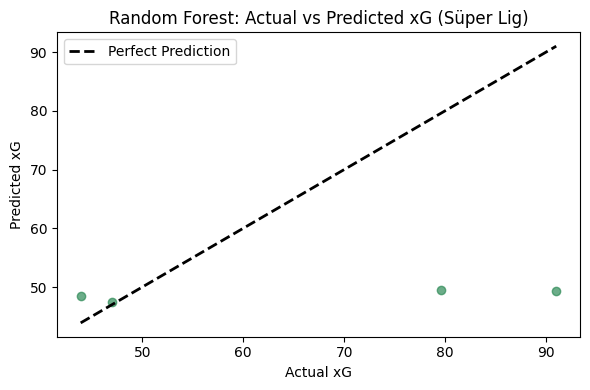

In [35]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model_sl = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_sl.fit(X_train_sl, y_train_sl)

# Predictions and evaluation
y_pred_rf_sl = rf_model_sl.predict(X_test_sl)
mse_rf_sl = mean_squared_error(y_test_sl, y_pred_rf_sl)
r2_rf_sl = r2_score(y_test_sl, y_pred_rf_sl)

# Print metrics
print(f"🌲 Random Forest - Süper Lig")
print(f"📊 Mean Squared Error: {mse_rf_sl:.2f}")
print(f"📈 R² Score: {r2_rf_sl:.2f}")

# Visualization
plt.figure(figsize=(6, 4))
plt.scatter(y_test_sl, y_pred_rf_sl, alpha=0.7, color="seagreen")
plt.plot([y_test_sl.min(), y_test_sl.max()], [y_test_sl.min(), y_test_sl.max()], 'k--', lw=2, label="Perfect Prediction")
plt.xlabel("Actual xG")
plt.ylabel("Predicted xG")
plt.title("Random Forest: Actual vs Predicted xG (Süper Lig)")
plt.legend()
plt.tight_layout()
plt.show()


In [36]:
# Sütun veri türlerini ve örnek değerleri inceleyelim
sample_values = {
    'Home Accurate passes': euro_df['Home Accurate passes'].iloc[:5].tolist(),
    'Home xG open play': euro_df['Home xG open play'].iloc[:5].tolist(),
    'Home Touches in opposition box': euro_df['Home Touches in opposition box'].iloc[:5].tolist(),
    'Away Accurate passes': euro_df['Away Accurate passes'].iloc[:5].tolist(),
    'Away xG open play': euro_df['Away xG open play'].iloc[:5].tolist(),
    'Away Touches in opposition box': euro_df['Away Touches in opposition box'].iloc[:5].tolist()
}

data_types = {
    'Home Accurate passes': euro_df['Home Accurate passes'].dtype,
    'Home xG open play': euro_df['Home xG open play'].dtype,
    'Home Touches in opposition box': euro_df['Home Touches in opposition box'].dtype,
    'Away Accurate passes': euro_df['Away Accurate passes'].dtype,
    'Away xG open play': euro_df['Away xG open play'].dtype,
    'Away Touches in opposition box': euro_df['Away Touches in opposition box'].dtype
}

sample_values, data_types


({'Home Accurate passes': ['643(94%)',
   '643(94%)',
   '365(83%)',
   '365(83%)',
   '383(84%)'],
  'Home xG open play': [1.09, 0.91, 1.06, 1.05, 0.73],
  'Home Touches in opposition box': [31, 10, 21, 34, 17],
  'Away Accurate passes': ['189(75%)',
   '189(75%)',
   '380(84%)',
   '380(84%)',
   '456(88%)'],
  'Away xG open play': [0.0, 2.11, 1.59, 0.43, 1.34],
  'Away Touches in opposition box': [2, 32, 27, 7, 44]},
 {'Home Accurate passes': dtype('O'),
  'Home xG open play': dtype('float64'),
  'Home Touches in opposition box': dtype('int64'),
  'Away Accurate passes': dtype('O'),
  'Away xG open play': dtype('float64'),
  'Away Touches in opposition box': dtype('int64')})

In [37]:
import re

# Sayıyı parantezden ayıran fonksiyon
def extract_number(value):
    if isinstance(value, str):
        match = re.match(r"(\d+)", value)
        return int(match.group(1)) if match else None
    return value

# Home ve Away için accurate passes'ı temizle
euro_df['Home Accurate passes'] = euro_df['Home Accurate passes'].apply(extract_number)
euro_df['Away Accurate passes'] = euro_df['Away Accurate passes'].apply(extract_number)

# Şimdi yeniden combined_df oluşturalım
home = euro_df[[
    'home_team', 'Home Accurate passes', 'Home xG open play', 'Home Touches in opposition box'
]].rename(columns={
    'home_team': 'Team',
    'Home Accurate passes': 'accurate_passes',
    'Home xG open play': 'xG',
    'Home Touches in opposition box': 'box_touches'
}).copy()

away = euro_df[[
    'away_team', 'Away Accurate passes', 'Away xG open play', 'Away Touches in opposition box'
]].rename(columns={
    'away_team': 'Team',
    'Away Accurate passes': 'accurate_passes',
    'Away xG open play': 'xG',
    'Away Touches in opposition box': 'box_touches'
}).copy()

# Birleştir
combined_df = pd.concat([home, away], ignore_index=True)

# Eksik değerleri at
combined_df = combined_df.dropna()

# Kontrol: artık kaç satır var?
combined_df.shape


(102, 4)

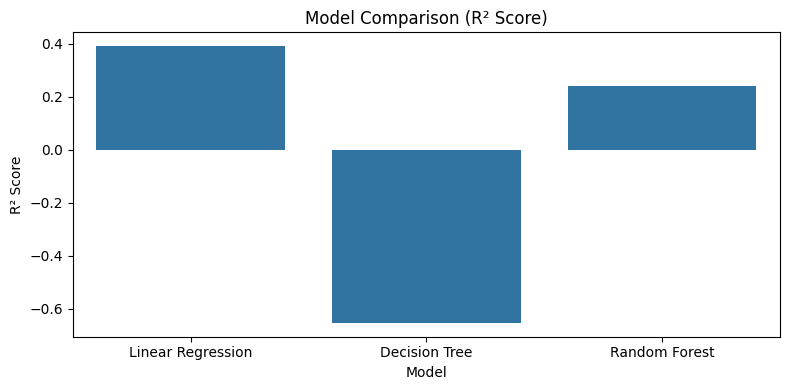

In [38]:
# Update features using only the available columns
features = combined_df[['box_touches', 'accurate_passes']]
target = combined_df['xG']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MSE': [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_dt),
        mean_squared_error(y_test, y_pred_rf)
    ],
    'R²': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf)
    ]
})

# Visualization
plt.figure(figsize=(8, 4))
sns.barplot(data=results, x='Model', y='R²')
plt.title('Model Comparison (R² Score)')
plt.ylabel('R² Score')
plt.tight_layout()

plt.show()


📊 Mean Squared Error (Random Forest): 0.36
📈 R² Score (Random Forest): 0.29


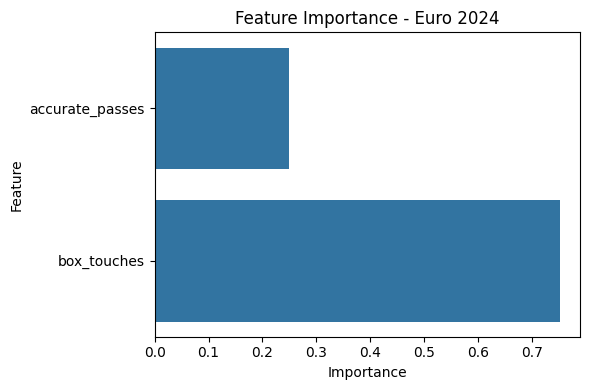

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming euro_df is already loaded and cleaned

# Combine Home and Away into one DataFrame
home = euro_df[[
    'home_team', 'Home Accurate passes', 'Home Touches in opposition box', 'Home Expected goals(xG)'
]].copy()

away = euro_df[[
    'away_team', 'Away Accurate passes', 'Away Touches in opposition box', 'Away Expected goals(xG)'
]].copy()

home.columns = ['team', 'accurate_passes', 'box_touches', 'xG']
away.columns = ['team', 'accurate_passes', 'box_touches', 'xG']

combined_df = pd.concat([home, away], ignore_index=True)

# Drop rows with missing or invalid values
combined_df = combined_df.dropna()
combined_df['accurate_passes'] = combined_df['accurate_passes'].astype(float)
combined_df['box_touches'] = combined_df['box_touches'].astype(float)
combined_df['xG'] = combined_df['xG'].astype(float)

# Features and Target
features = combined_df[['accurate_passes', 'box_touches']]
target = combined_df['xG']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict
y_pred = rf_model.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 Mean Squared Error (Random Forest): {mse:.2f}")
print(f"📈 R² Score (Random Forest): {r2:.2f}")

# Visualization: Feature Importance
importances = rf_model.feature_importances_
feature_names = features.columns

plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - Euro 2024")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


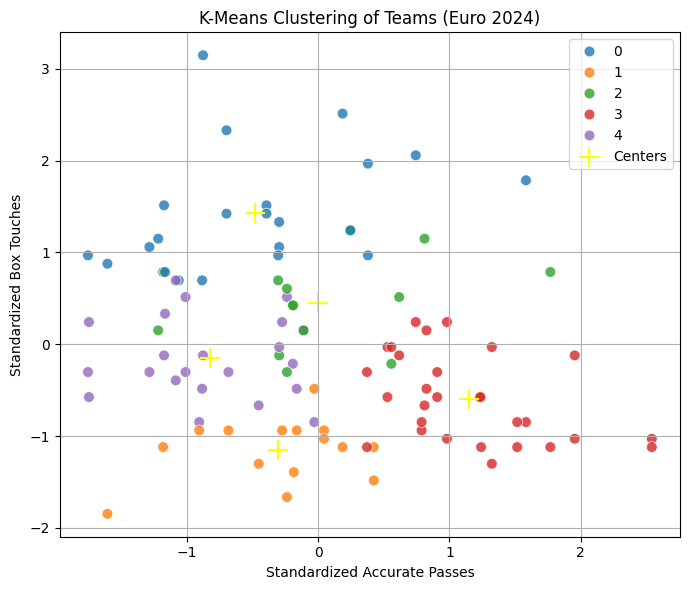

In [46]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Select the features to use (only numeric ones)
cluster_features = combined_df[['accurate_passes', 'box_touches', 'xG']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)

# Train the K-Means model (5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add the cluster results to the original dataframe
combined_df['cluster'] = cluster_labels

# Visualization (first two dimensions - either via PCA or directly selected features)
plt.figure(figsize=(7, 6))
sns.scatterplot(
    x=scaled_features[:, 0],  # accurate_passes
    y=scaled_features[:, 1],  # box_touches
    hue=cluster_labels,
    palette='tab10',
    alpha=0.8,
    s=60
)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='yellow', marker='+', s=200, label='Centers')
plt.title("K-Means Clustering of Teams (Euro 2024)")
plt.xlabel("Standardized Accurate Passes")
plt.ylabel("Standardized Box Touches")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
